# Hands On Python 3 - Datenaufbereitung
Dieses Notebook zeigt wie
- man Daten aus zwei csv Dateien zu einem Datensatz zusammenfügen kann
- wie man mit nicht existenten Werten (NaN - Not a Number) umgeht
- wie man Zeitreihen mit unterschiedlichen Frequenzen auf eine gemeinsame Frequenz bringen kann

## Notwendige Bibliotheken importieren

In [1]:
# notwendige Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt

## Daten einlesen

In [190]:
# Daten der 1. Quelle
rawData1 = pd.read_csv('source1.csv')

# Lesen Sie die Daten der 2. Quelle ein
rawData2 = pd.read_csv('source2.csv')

In [191]:
# Anzahl der Zeilen und Spalten ausgeben 

# Geben Sie Zeilen und Spalten des 1. Datensatzes von Quelle 1 aus
print("Datensatz 1: ")
print(f"{rawData1.shape[0]} Zeilen und {rawData1.shape[1]} Spalten\n")

# Geben Sie Zeilen und Spalten des 2. Datensatzes von Quelle 2 aus
print("Datensatz 2: ")
print(f"{rawData2.shape[0]} Zeilen und {rawData2.shape[1]} Spalten")


Datensatz 1: 
135 Zeilen und 5 Spalten

Datensatz 2: 
45 Zeilen und 2 Spalten


In [192]:
# Geben Sie die ersten Zeilen von Quelle 1 aus:
rawData1.head()

,Date,Energy,Light,CO2,Occupancy
0,2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
1,2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2,2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
3,2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
4,2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


In [193]:
# Geben Sie die ersten Zeilen von Quelle 2 aus:
rawData2.head()

,Date,Temperature
0,2015-02-02 14:00:00,23.657118
1,2015-02-02 15:00:00,23.293950
2,2015-02-02 16:00:00,22.773142
3,2015-02-02 17:00:00,22.534520
4,2015-02-02 18:00:00,21.993372


In [194]:
# Geben Sie die letzten Zeilen von Quelle 1 aus:
rawData1.tail()

,Date,Energy,Light,CO2,Occupancy
130,2015-02-03 22:45:00,25.365469,0.0,570.291667,0.0
131,2015-02-03 23:00:00,25.242750,0.0,563.398810,0.0
132,2015-02-03 23:15:00,25.146556,0.0,559.753333,0.0
133,2015-02-03 23:30:00,25.029479,0.0,555.600000,0.0
134,2015-02-03 23:45:00,24.941250,0.0,553.130952,0.0


In [195]:
# Geben Sie die letzten Zeilen von Quelle 2 aus
rawData2.tail()

,Date,Temperature
40,2015-02-04 06:00:00,20.576972
41,2015-02-04 07:00:00,20.509123
42,2015-02-04 08:00:00,20.957842
43,2015-02-04 09:00:00,22.234915
44,2015-02-04 10:00:00,23.946885


## Daten auf fehlende Werte hin überprüfen

In [196]:
# Geben Sie sich die Anzahl der NaNs in den Spalten von Quelle 2 aus:
rawData2.isna().sum()

Date           0
Temperature    0
dtype: int64

In [215]:
# Sofern der Datensatz keine NaNs erhält --> Kopie der Rohdaten namens data2 erstellen und damit direkt weiterarbeiten:
data2 = rawData2.copy() if rawData2.isna().sum().sum() == 0 else None
data2.head()

,Date,Temperature
0,2015-02-02 14:00:00,23.657118
1,2015-02-02 15:00:00,23.293950
2,2015-02-02 16:00:00,22.773142
3,2015-02-02 17:00:00,22.534520
4,2015-02-02 18:00:00,21.993372


In [198]:
# Wie sieht es bei rawData1 aus? Geben Sie für rawData1 die Anzahl der NaNs in den Spalten aus
rawData1.isna().sum()

Date          0
Energy        0
Light        10
CO2           0
Occupancy     0
dtype: int64

## Mit NaNs umgehen

### Möglichkeit 1: alle Zeilen, in denen mindestens 1x NaN vorkommt, löschen

In [199]:
# Kopie der Rohdaten anlegen
data1_del = rawData1.copy() 

# Zeilen mit mind. 1x NaN löschen (d.h. in irgendeiner Spalte kommt ein NaN vor --> Zeile wird gelöscht)
data1_del.dropna(inplace=True)

# Überprüfen
data1_del.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

### Möglichkeit 2: Fehlende Werte durch interpolierte Werte ersetzen

### Linear Interpolieren

In [200]:
# Führen Sie eine lineare Interpolation durch. Erstellen Sie sich dazu zunächst data1_ip als Kopie von rawData1
data1_ip = rawData1.copy()
data1_ip.interpolate(method='linear', inplace=True)

# Geben Sie sich die Anzahl an NaN in den Spalten nach der Interpolation aus:
data1_ip.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

<Axes: >

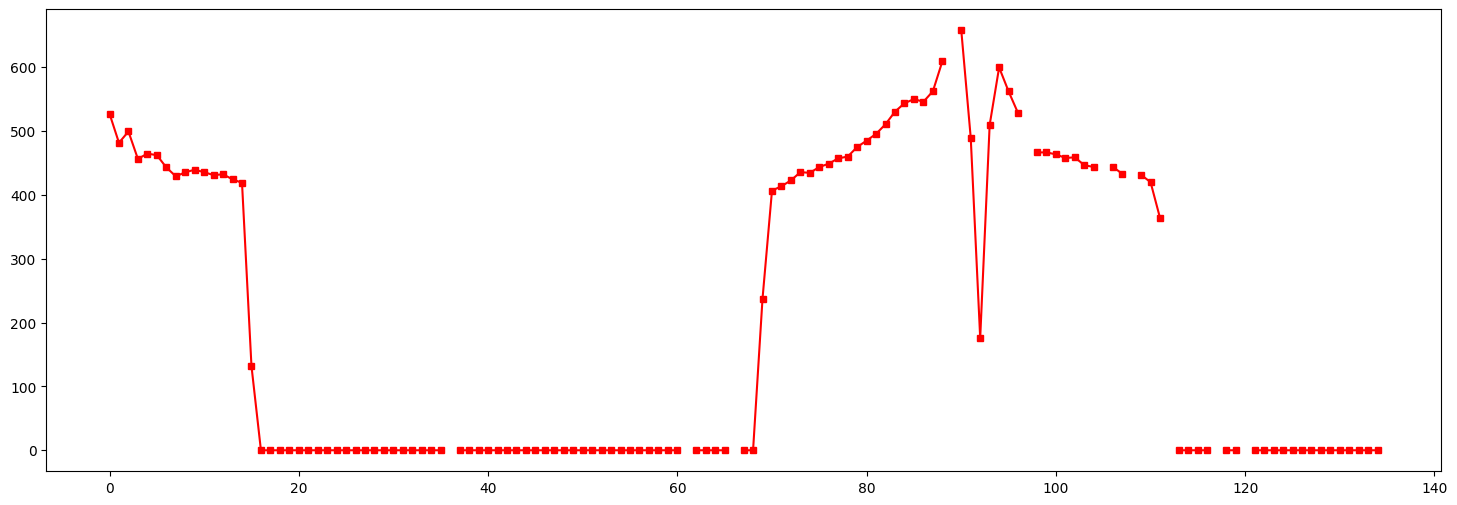

In [201]:
# Plotten der alten Zeitreihe
plt.figure(figsize=(18, 6))
rawData1['Light'].plot(marker='s', color='red', markersize=4)

<Axes: >

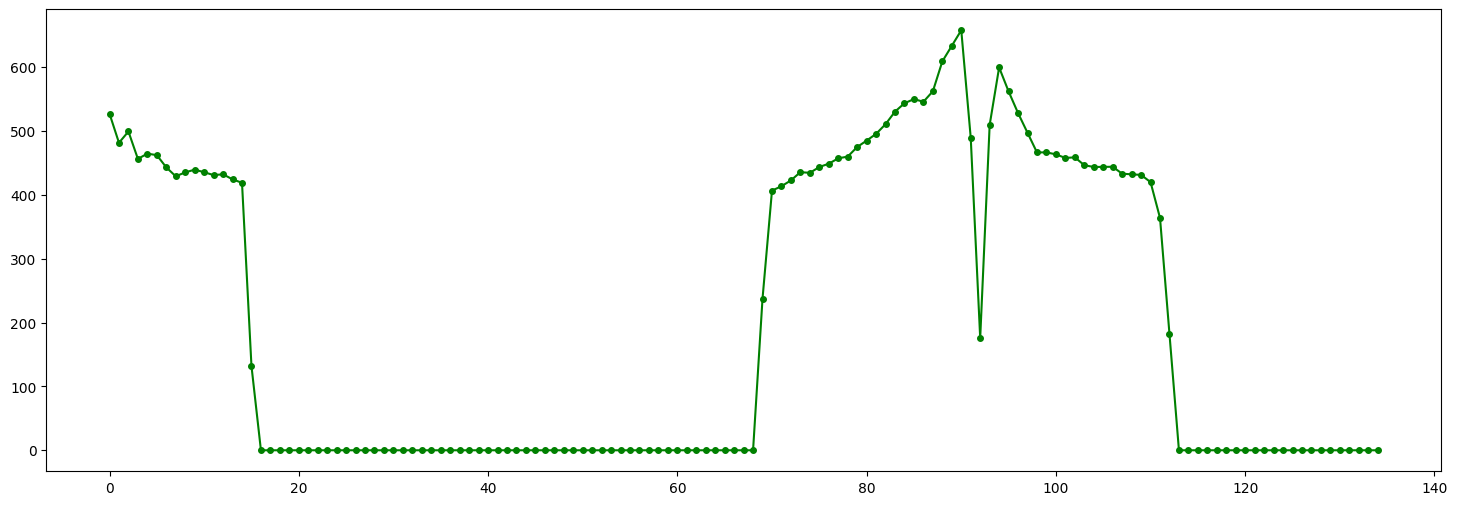

In [202]:
#neue Zeitreihe mit interpolierten Werten plotten
plt.figure(figsize=(18, 6))
data1_ip['Light'].plot(marker='o', color='green', markersize=4)  

Wie zufrieden sind Sie mit der Interpolation?

*Sehr.*

In [203]:
# Grundsätzlich ist auch möglich mit Polynomfunktionen zu interpolieren.
# Interpolieren Sie quadratisch (method='polynomial', order=2)
data1_ip2 = rawData1.copy()
data1_ip2.interpolate(method='polynomial', order=2, inplace=True)

# Anzahl an NaN in Spalten ausgeben
data1_ip2.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

<Axes: >

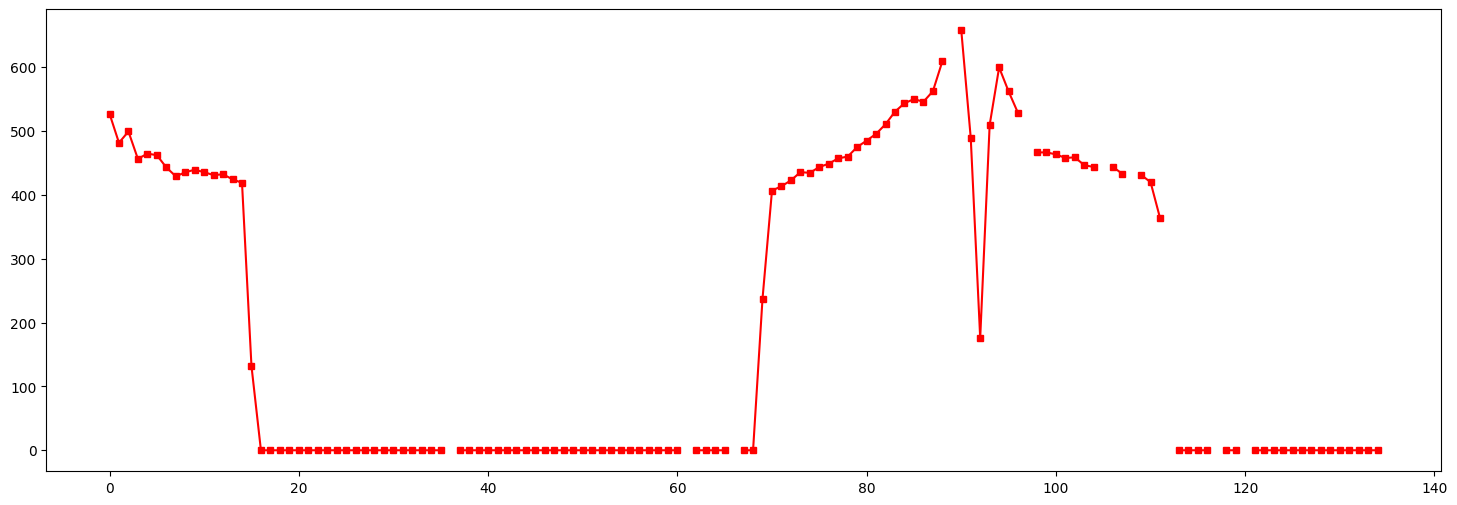

In [204]:
# Plotten Sie zum Vergleich wieder die alte und die neue Zeitreihe 
# Plot der alten Zeitreihe:
plt.figure(figsize=(18, 6))
rawData1['Light'].plot(marker='s', color='red', markersize=4)

<Axes: >

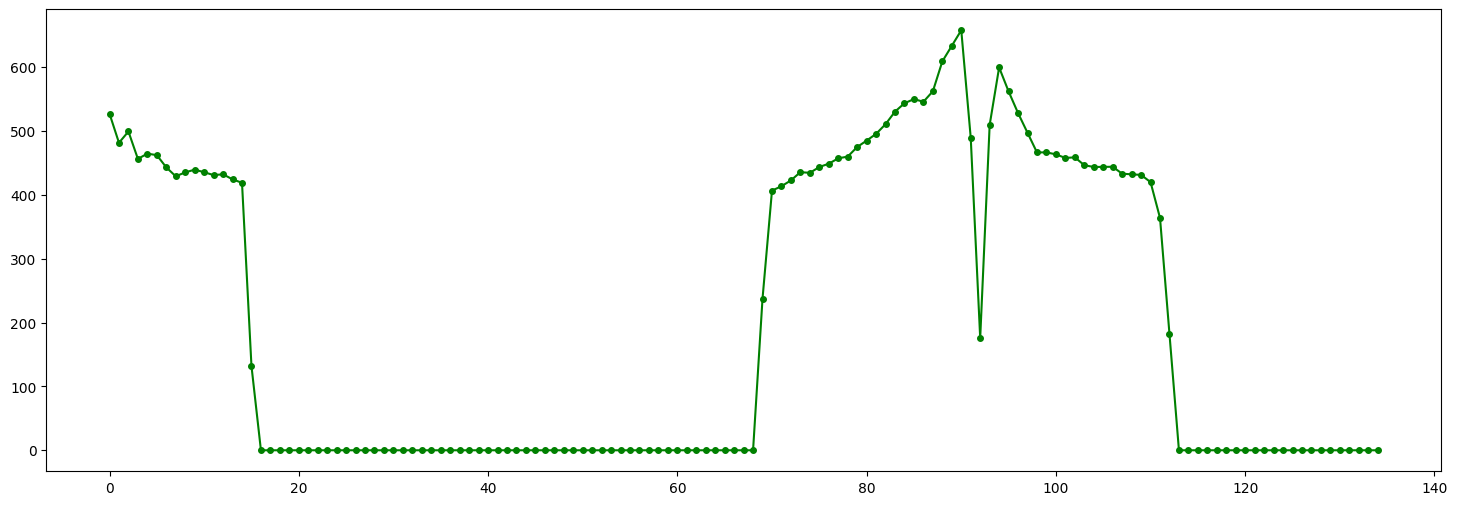

In [205]:
# Plot der Zeitreihe mit linearer Interpolation:
plt.figure(figsize=(18, 6))
data1_ip['Light'].plot(marker='o', color='green', markersize=4)  

<Axes: >

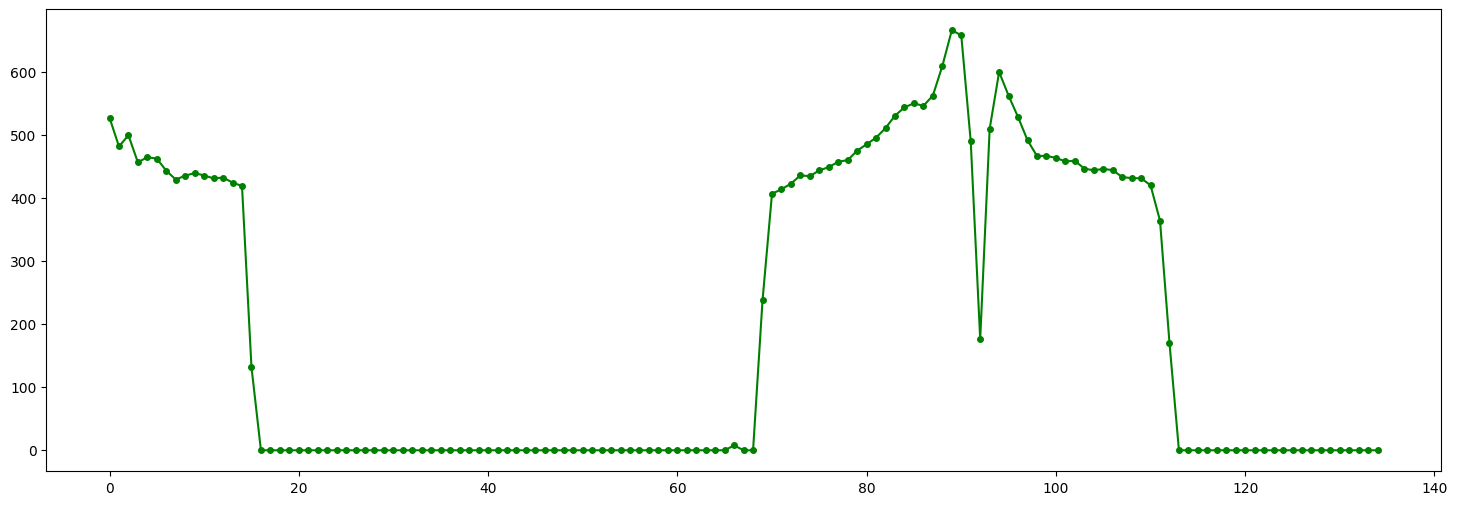

In [206]:
# Plot der neuen Zeitreihe mit quadratischer Interpolation:
plt.figure(figsize=(18, 6))
data1_ip2['Light'].plot(marker='o', color='green', markersize=4) 

Hat sich die quadratische Interpolation im Vergleich zur linearen gelohnt? Welches der beiden Interpolationsverfahren würden Sie wählen?

*Die quadratische Interpolation hat genauere Ergebnisse geliefert, da die Werte einen nichtllinearen Zusammenhang miteinander haben. In einem Datensatz wo die Werte linear zusammenhängen, sollte auch linear interpoliert werden. Ansonsten bietet sich an, andere Interpolationsmethoden wie polinomial zu benutzen.*

## Zeitstempel als Index setzen
- Momentan sind die Zeilenindizes einfach durchnummeriert: 0,1,2,...
- Wenn der Zeitstempel als Index gesetzt wird, kann man einfacher arbeiten
- Dafür muss der Zeitstempel als erstes in das Format datetime gebracht werden, damit Python ihn als Zeitstempel erkennt

In [207]:
# die Spalte Date ist noch nicht im datetime Format
data1_ip.dtypes

Date          object
Energy       float64
Light        float64
CO2          float64
Occupancy    float64
dtype: object

In [208]:
# Bringen Sie die Spalte Date ins datetime Format 
data1_ip['Date'] = pd.to_datetime(data1_ip['Date'])

In [209]:
# Indizieren Sie mit der Zeitstempel-Spalte 
if data1_ip.index.name != 'Date':
    data1_ip.set_index('Date', inplace=True)

# Kontrollieren Sie das durch Ausgabe der ersten Zeilen des Datensatzes. 
data1_ip.head()

,Energy,Light,CO2,Occupancy
Date,,,,
2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


In [210]:
data1_ip.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

Wieso wird bei wiederholtem Ausführen obiger Zelle ein Fehler geworfen? Müssen Sie etwas am Code korrigieren?

*Ein Fehler tritt auf, weil der Index `Date` bereits gesetzt ist. Das liegt daran, dass `set_index` versucht, den Index erneut zu setzen, obwohl er bereits auf `Date` gesetzt ist. Dies kann zu einem Konflikt führen.*

*Um diesen Fehler zu vermeiden, sollte man vor dem erneuten Ausführen von `set_index`  überprüfen, ob der Index bereits auf `Date` gesetzt ist.*

In [216]:
# Indizieren Sie auch data2 mit dessen Zeitstempel
data2['Date'] = pd.to_datetime(data2['Date'])

In [217]:
if data2.index.name != 'Date':
    data2.set_index('Date', inplace=True)

data2.head()

,Temperature
Date,
2015-02-02 14:00:00,23.657118
2015-02-02 15:00:00,23.293950
2015-02-02 16:00:00,22.773142
2015-02-02 17:00:00,22.534520
2015-02-02 18:00:00,21.993372


## Datensätze zu einem Zusammenfügen
- Problem: Die Datensätze haben unterschiedliche Frequenzen: Datensatz 1: 15min, Datensatz 2: stündlich
- Möglichkeit 1: Nur die Indizes nehmen, die sowohl in Datensatz 1, als auch in Datensatz 2 sind, also jede volle Stunde
- Möglichkeit 2: Den Datensatz mit der höheren Frequenz (Datensatz 1) runtersamplen, z.B. indem der stündliche Mittelwert oder die Summe über je eine Stunde gebildet wird

Frage: Worauf muss man aufpassen, wenn man Möglichkeit 2 wählt?
- *Ergebnisse können unkonsistent sein* 
- *Zeitstempel auf die Stunden aufrunden*
- *Datensatzqualität kann damit leiden*

### Möglichkeit 1: Nur die Indizes nehmen, die sowohl in Datensatz 1, als auch in Datensatz 2 sind

In [218]:
# Neuen Datensatz definieren, der aus Datensatz 2 von rechts angehängt an Datensatz 1 besteht
data = pd.concat([data1_ip, data2], axis=1)

# Dort wo keine Werte für den jeweiligen Zeitstempel vorhanden sind, werden NaN eingefügt
data.head()

,Energy,Light,CO2,Occupancy,Temperature
Date,,,,,
2015-02-02 14:00:00,NaN,NaN,NaN,NaN,23.657118
2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0,NaN
2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0,NaN
2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0,NaN
2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0,23.293950


In [219]:
# Löschen Sie nun noch die Zeilen in denen mindestens 1x NaN vorkommt:
data.dropna(inplace=True)

# Ausgabe der ersten Zeilen von data zur Kontrolle:
data.head()

,Energy,Light,CO2,Occupancy,Temperature
Date,,,,,
2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0,23.293950
2015-02-02 16:00:00,28.074896,429.187500,1078.897917,1.0,22.773142
2015-02-02 17:00:00,25.045857,431.085714,828.878571,1.0,22.534520
2015-02-02 18:00:00,24.919900,131.936667,782.071111,0.0,21.993372
2015-02-02 19:00:00,24.088542,0.000000,621.942708,0.0,21.276331


## Möglichkeit 2: 
- Datensatz 1 soll von 15minüten auf stündliche Werte runtergesampelt werden
- Für die Spalten Light und CO2 soll dazu der stündliche Mittelwert genommen werden
- Für die Spalte Energy soll dazu jeweils die Summe über die 4 Werte in einer Stunde gebildet werden
- Für die Spalte Occupancy soll einfach der Wert zur vollen Stunde genommen werden

In [220]:
# Ursprünglicher Datensatz
data1_ip.head()

,Energy,Light,CO2,Occupancy
Date,,,,
2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


In [221]:
# Ursprünglichen Datensatz aufteilen

# nur die Spalten, die gemittelt werden sollen 
data1_mean = data1_ip.copy()
data1_mean.drop(['Energy', 'Occupancy'], axis=1, inplace=True)
data1_mean.head()

,Light,CO2
Date,,
2015-02-02 14:15:00,527.283333,785.951515
2015-02-02 14:30:00,481.697917,894.539583
2015-02-02 14:45:00,499.415646,992.291327
2015-02-02 15:00:00,456.436190,1051.151905
2015-02-02 15:15:00,464.760417,1101.779167


In [223]:
# Generieren Sie einen Datensatz data1_sum, der nur die Spalten enthält, die summiert werden sollen
data1_sum = data1_ip[['Energy']]
data1_sum.head() # nur Energy muss summiert werden

,Energy
Date,
2015-02-02 14:15:00,26.285636
2015-02-02 14:30:00,27.016313
2015-02-02 14:45:00,27.612107
2015-02-02 15:00:00,28.006019
2015-02-02 15:15:00,28.489948


In [224]:
# Generieren Sie einen Datensatz data1_binary, der nur die Spalten enthält, die weder gemittelt noch aufsummiert werden sollen
data1_binary = data1_ip[['Occupancy']]

In [230]:
# Bringen Sie den Datensatz data1_mean durch Mittelwertbildung auf eine höhere Frequenz (stündlich):
data1_mean_hourly = data1_mean.resample(rule = '1H').mean()

# Lassen Sie sich zur Kontrolle die ersten Zeilen ausgeben:
data1_mean_hourly.head()

,Light,CO2
Date,,
2015-02-02 14:00:00,502.798965,890.927475
2015-02-02 15:00:00,456.677902,1103.590327
2015-02-02 16:00:00,434.929193,980.338952
2015-02-02 17:00:00,426.717991,821.892560
2015-02-02 18:00:00,32.984167,719.712031


In [231]:
# Bringen Sie data1_sum durch Summenbildung auf eine höhere Frequenz (stündlich). (statt .mean() verwenden Sie .sum())
data1_sum_hourly = data1_sum.resample(rule = '1H').sum()

# Ausgabe der ersten Zeilen zur Kontrolle:
data1_sum_hourly.head()

,Energy
Date,
2015-02-02 14:00:00,80.914056
2015-02-02 15:00:00,113.657907
2015-02-02 16:00:00,106.986065
2015-02-02 17:00:00,99.873477
2015-02-02 18:00:00,98.368227


In [234]:
# Bringen Sie den Datensatz data1_binary auf eine höhere Frequenz (stündlich). 
# Dafür soll immer der Wert des Merkmals Occupancy zu vollen Stunde genommen werden, die anderen Werte sollen verworfen werden. 
data1_binary_hourly = data1_binary.resample(rule = '1H').first()

# Ausgabe der ersten Zeilen zur Kontrolle:
data1_binary_hourly.head()

,Occupancy
Date,
2015-02-02 14:00:00,1.0
2015-02-02 15:00:00,1.0
2015-02-02 16:00:00,1.0
2015-02-02 17:00:00,1.0
2015-02-02 18:00:00,0.0


In [235]:
# Daten zusammenfügen
data = pd.concat([data2, data1_sum_hourly, data1_mean_hourly, data1_binary_hourly], axis=1)

data.head()

,Temperature,Energy,Light,CO2,Occupancy
Date,,,,,
2015-02-02 14:00:00,23.657118,80.914056,502.798965,890.927475,1.0
2015-02-02 15:00:00,23.293950,113.657907,456.677902,1103.590327,1.0
2015-02-02 16:00:00,22.773142,106.986065,434.929193,980.338952,1.0
2015-02-02 17:00:00,22.534520,99.873477,426.717991,821.892560,1.0
2015-02-02 18:00:00,21.993372,98.368227,32.984167,719.712031,0.0


In [236]:
# Entfernen von Zeilen mit mind. 1x NaN falls vorhanden:
data.dropna(inplace=True)

In [237]:
# Ausgabe der ersten Zeilen von data
data.head()

,Temperature,Energy,Light,CO2,Occupancy
Date,,,,,
2015-02-02 14:00:00,23.657118,80.914056,502.798965,890.927475,1.0
2015-02-02 15:00:00,23.293950,113.657907,456.677902,1103.590327,1.0
2015-02-02 16:00:00,22.773142,106.986065,434.929193,980.338952,1.0
2015-02-02 17:00:00,22.534520,99.873477,426.717991,821.892560,1.0
2015-02-02 18:00:00,21.993372,98.368227,32.984167,719.712031,0.0


In [238]:
# Ausgabe der Anzahl NaN in den jeweiligen Spalten
data.isna().sum()

Temperature    0
Energy         0
Light          0
CO2            0
Occupancy      0
dtype: int64